NAME: AADHIRA  D

BATCH: November Phase 2 OIBSIP

DATA SCIENCE OASIS INTERNSHIP

TASK 3

PROJECT NAME: CAR PRICE PREDICTON WITH MACHINE LEARNING

PROBLEM STATEMENT: The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [67]:
data=pd.read_csv("C:/Users/aadhi/OneDrive/Desktop/car data.csv")

In [68]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [69]:
data.shape

(301, 9)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [71]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [72]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [73]:
#Checking the distribution of categorical  data

print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [74]:
#encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the "Selling_type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

#ncoding the "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [75]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [76]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


In [77]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)

In [78]:
y=data["Selling_Price"]

In [79]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [80]:

print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [81]:
#Splitting Training and Test data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [82]:
#Training The Model
#Loading the linear regression model

lin_reg_model=LinearRegression()

In [83]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [84]:
#prediction on traning data

training_data_prediction=lin_reg_model.predict(X_train)

In [85]:
# R-squared error 
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Eroor:",error_score)

R squared Eroor: 0.8680830940612678


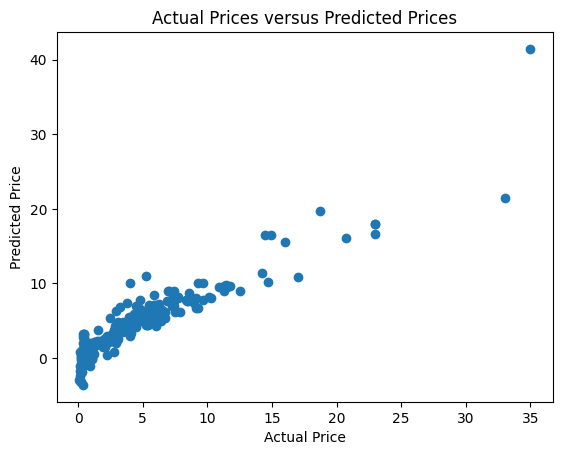

In [86]:
#Visualize the prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show()

In [87]:
#prediction on test data

test_data_prediction=lin_reg_model.predict(X_test)

In [88]:
# R-squared error 
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Eroor:",error_score)

R squared Eroor: 0.9133788577647025


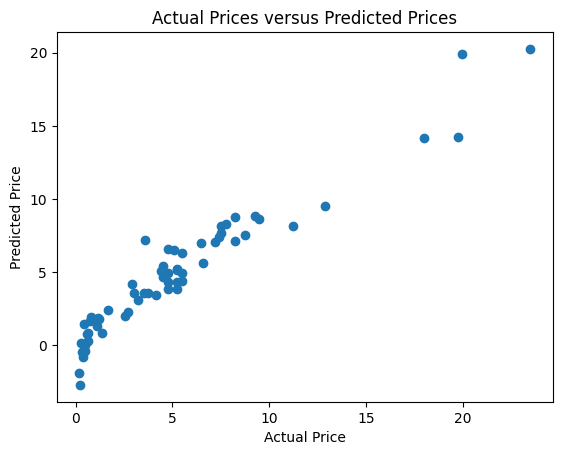

In [89]:
#Visualize the prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show()

In [90]:
#Loading the Lasso Regression model

lass_reg_model=Lasso()

In [91]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [92]:
#prediction on traning data

training_data_prediction=lass_reg_model.predict(X_train)

In [93]:
# R-squared error 
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared Eroor:",error_score)

R squared Eroor: 0.8315232865153552


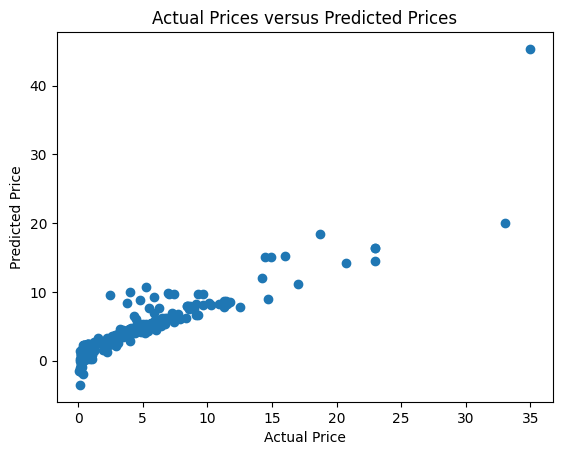

In [94]:
#Visualize the prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show()

In [95]:
#prediction on test data

test_data_prediction=lass_reg_model.predict(X_test)

In [96]:
# R-squared error 
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared Eroor:",error_score)

R squared Eroor: 0.86785105350902


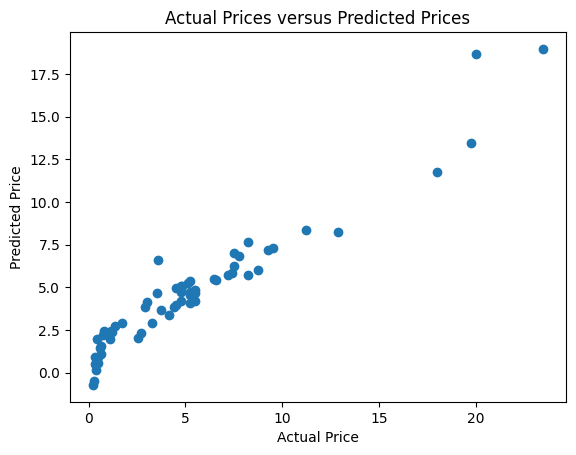

In [97]:
#Visualize the prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices versus Predicted Prices")
plt.show() 

EDA

<Axes: ylabel='Selling_Price'>

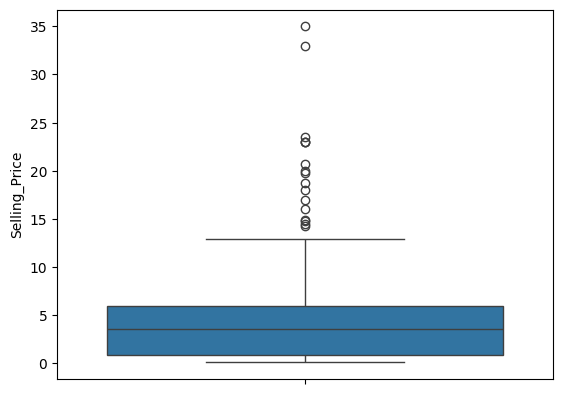

In [98]:
#checking the outliers
sns.boxplot(data['Selling_Price'])

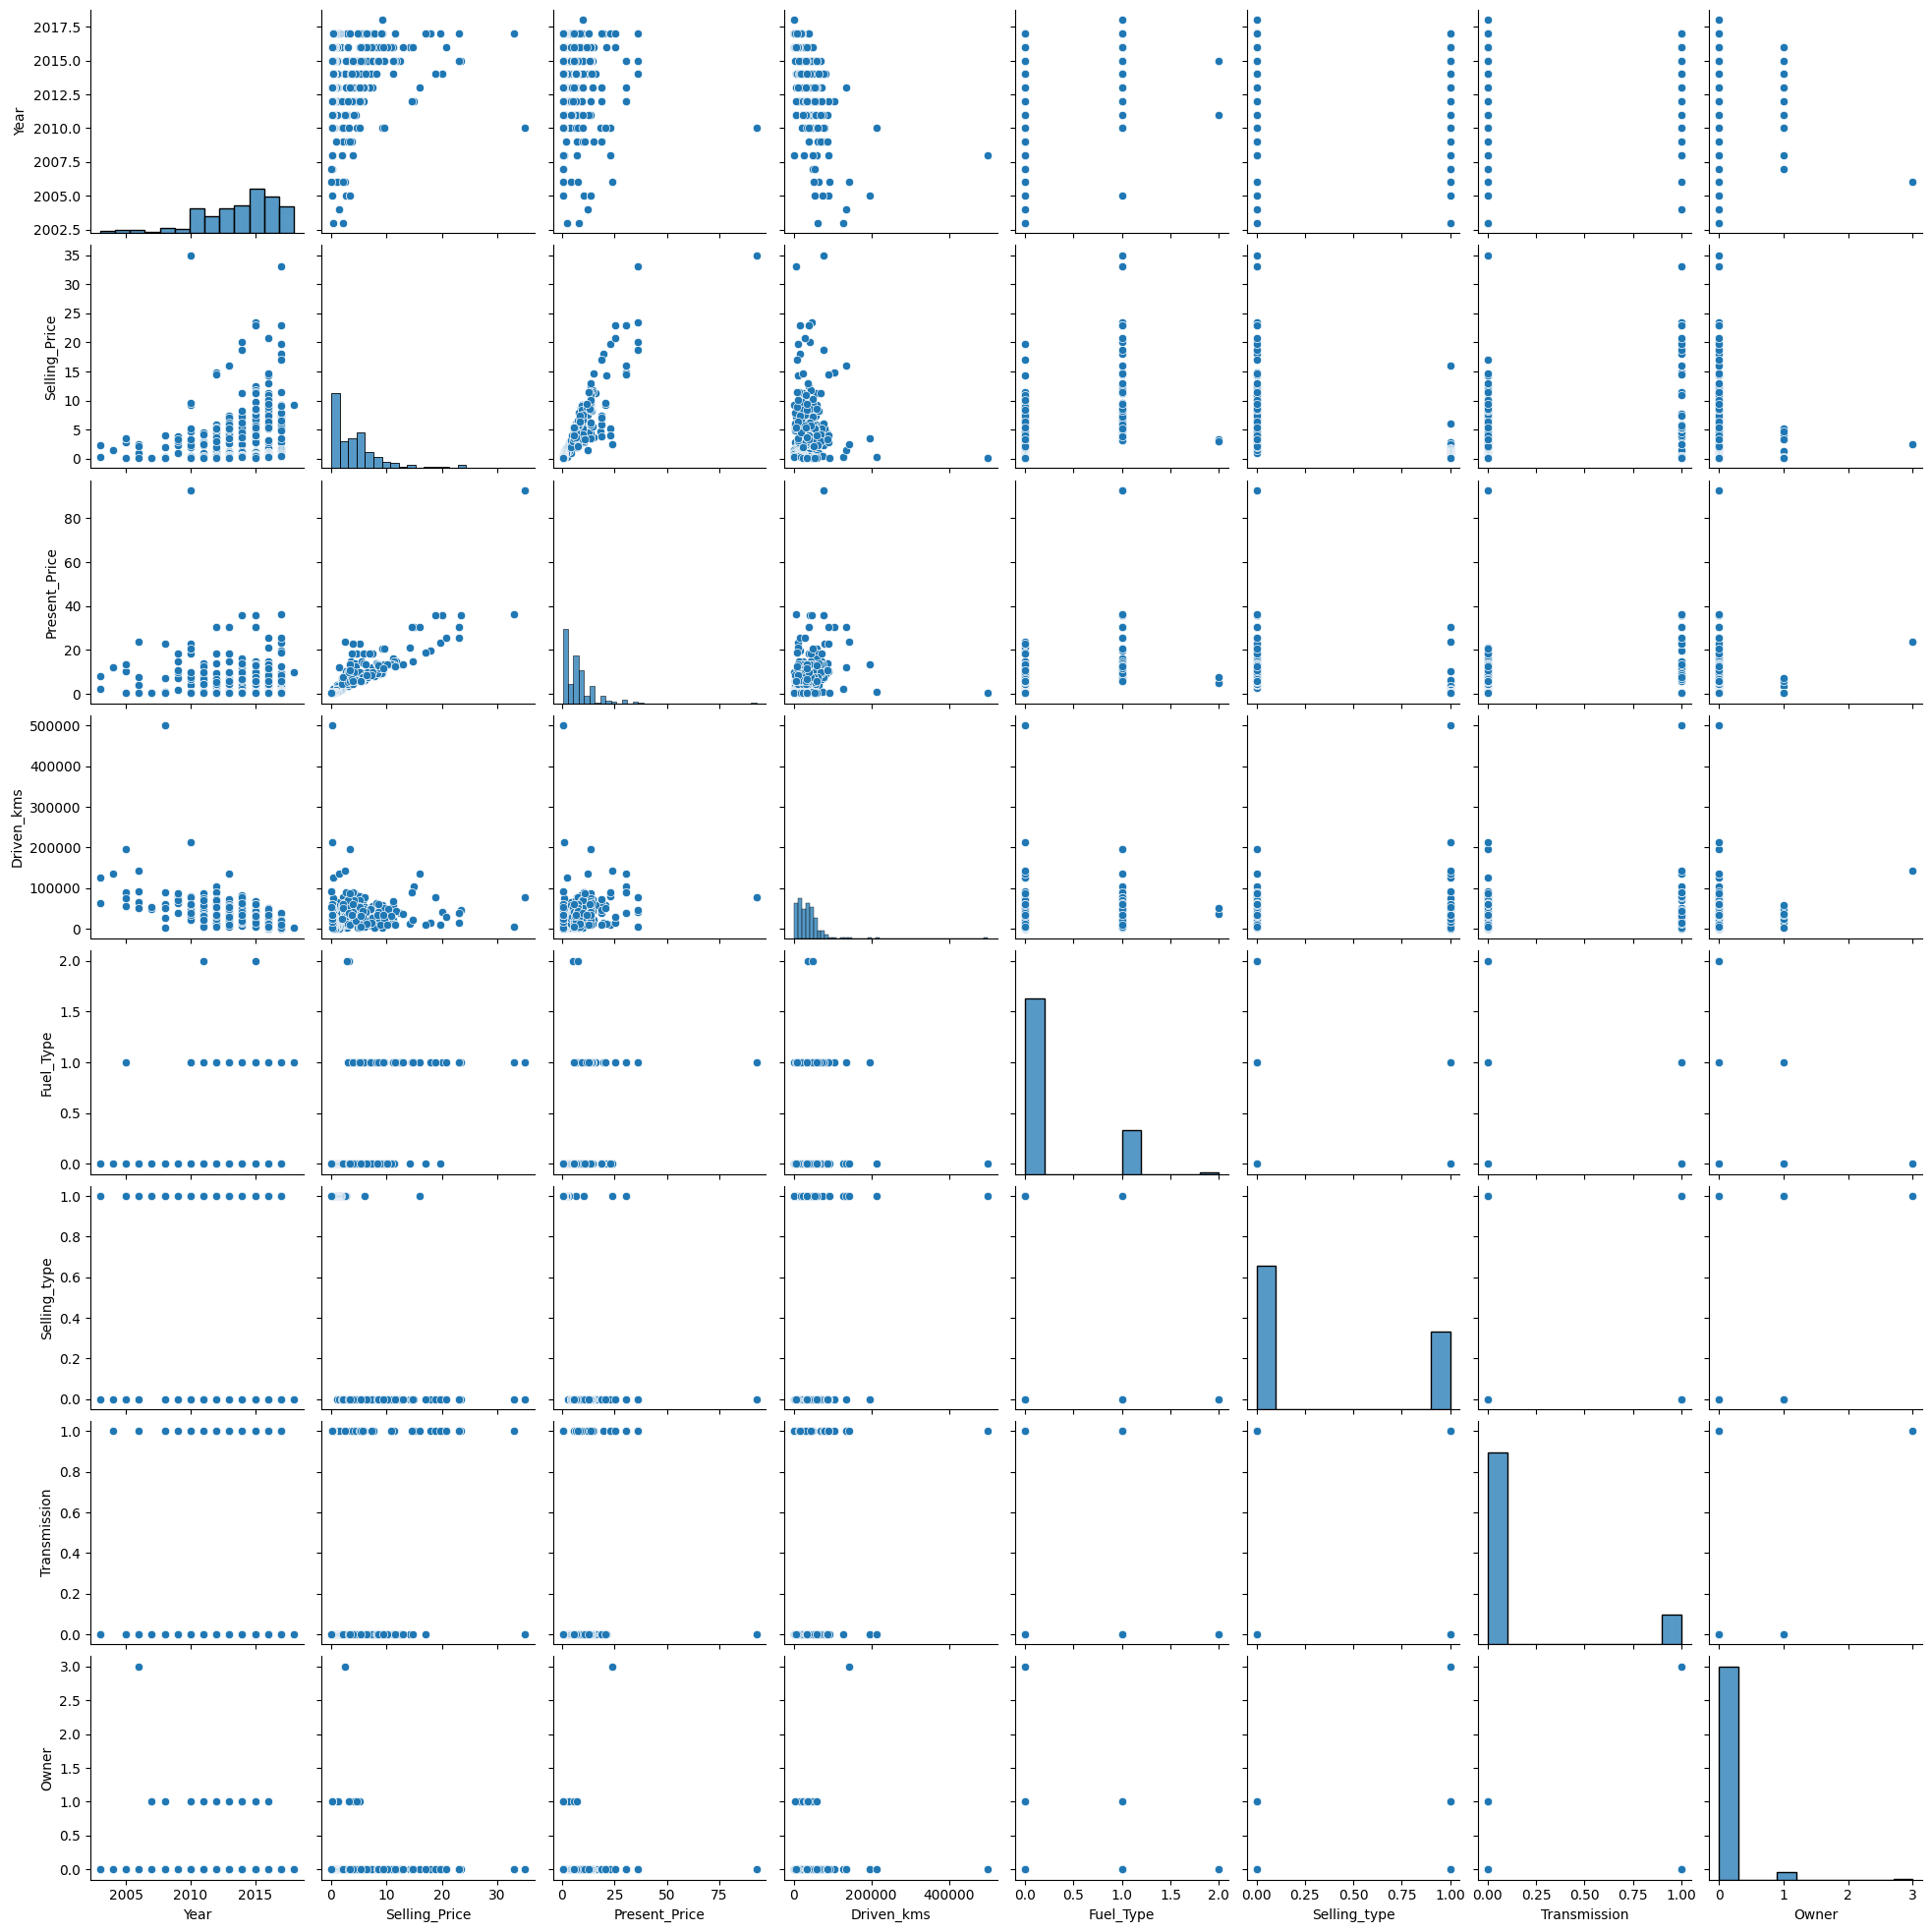

In [99]:
sns.pairplot(data)

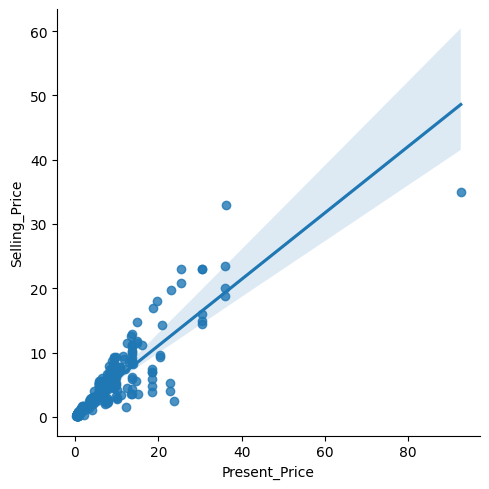

In [100]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=data)